# **Análisis de un Dataset de ventas al detalle**

#### Librerías utilizadas

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **Exploración de datos**

In [12]:
# Lectura del archivo Online Retail
file_path = "Online Retail.xlsx"
df = pd.read_excel(file_path)

In [13]:
# Primeras filas del dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


El dataset está compuesto por 8 columnas, donde 3 son variables cuantitativas (cadenas de texto), 4 son variables numéricas y 1 es una serie de tiempo.

In [14]:
# Información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [15]:
# Análisis exploratorio de datos (resumen estadístico)
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


##### Columna ***Quantity***
La cantidad de registros en esta columna es de 541909. En promedio, la cantidad total de productos vendidos es de 9.55 productos, por tanto, podríamos inferir que serían 10 productos. La desviación estándar es de 218.08, lo cual indica que la variabilidad entre las cantidades pedidas oscila en ese valor respecto al promedio; además, hay una gran variabilidad. El valor mínimo de la columna es -80955, lo cual es inusual dado que las cantidades son números enteros y podría indicar un error en los datos. El valor máximo es 80955, el cual es muy grande y podría representar un error por las razones anteriores y considerando que la empresa vende al detal. Finalmente, hablando de los cuartiles, el 25% de las transacciones tuvieron una cantidad igual o menor a 1; el 50% de las transacciones tuvieron una cantidad igual o menor a 3; y el 75% de las transacciones tuvieron una cantidad menor o igual a 10.
##### Columna ***UnitPrice***
La cantidad de registros en esta columna es de 541909. En promedio, el precio unitario de los productos es de 4.61 USD. La desviación estándar es de 96.75 USD, lo cual indica que la variabilidad entre las cantidades pedidas oscila en ese valor respecto al promedio; además, hay una gran variabilidad. El valor mínimo de la columna es -11062.06 USD, lo cual es inusual y podría indicar un error en los datos, debido a que es un valor negativo; aunque podría significar la devolución de dinero. El valor máximo es 38970 USD, el cual es muy grande considerando que la empresa vende al detal. Finalmente, hablando de los cuartiles, el 25% de las transacciones tuvieron una cantidad igual o menor a 1.25 USD; el 50% de las transacciones tuvieron una cantidad igual o menor a 2.08 USD; y el 75% de las transacciones tuvieron una cantidad menor o igual a 4.13 USD. Teniendo en cuenta el valor de la mediana, la cual es una medida robusta, podemos confirmar la sospecha de que la columna tiene valores erróneos, puesto que esta es muy pequeña respecto al mínimo y el máximo.
##### Columna ***Customer ID***
Las estadísticas de esta columna son insignificantes, porque a pesar de estar representadas por un valor numúerico, no se pueden interpretar porque solo indican la identificación de cada cliente. 

Cantidad de outliers en la variable Quantity: 58619


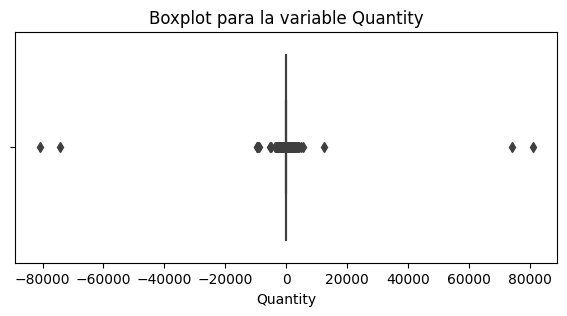

Cantidad de outliers en la variable UnitPrice: 39627


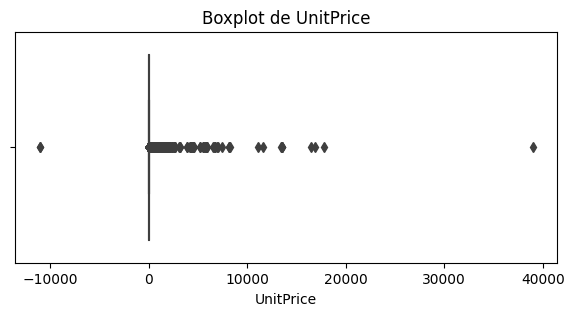

In [16]:
# Identificación de valores atípicos para Quantity mediante diagramas de cajas y bigotes. Los valores que están afuera de los bigotes son atípicos
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
lower_bound_quantity = Q1_quantity - 1.5 * (Q3_quantity - Q1_quantity) # La diferencia entre el cuartil 3 y el cuartil 1 es el rango intercuartílico
upper_bound_quantity = Q3_quantity + 1.5 * (Q3_quantity - Q1_quantity)
outliers_quantity = df[(df['Quantity'] < lower_bound_quantity) | (df['Quantity'] > upper_bound_quantity)]
print(f"Cantidad de outliers en la variable Quantity: {outliers_quantity.shape[0]}")

# Diagrama de cajas y bigotes para la variable Quantity
plt.figure(figsize=(7, 3))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot para la variable Quantity')
plt.show()

# Identificación de valores atípicos para UnitPrice mediante diagrama de cajas y bigotes. Los valores que están afuera de los bigotes son atípicos
Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
lower_bound_unitprice = Q1_unitprice - 1.5 * (Q3_unitprice - Q1_unitprice) 
upper_bound_unitprice = Q3_unitprice + 1.5 * (Q3_unitprice - Q1_unitprice)
outliers_unitprice = df[(df['UnitPrice'] < lower_bound_unitprice) | (df['UnitPrice'] > upper_bound_unitprice)]
print(f"Cantidad de outliers en la variable UnitPrice: {outliers_unitprice.shape[0]}")

# Diagrama de cajas y bigotes para la variable UnitPrice
plt.figure(figsize=(7, 3))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot de UnitPrice')
plt.show()

Observación: De acuerdo con el boxplot de la variable Quantity podríamos sospechar que las cantidades en valores negativos son devoluciones o retrocesos en las transacciones debido a errores, por ejemplo, errores de digitación de los usuarios, dada la simetría de los valores respecto al boxplot. Por otro lado, es mayor la cantidad de valores atípicos en la variable Quantity que en la variable UnitPrice.

#### **Limpieza de datos**

In [17]:
# Eliminar valores atípicos, ya que estos alterarían los resultados futuros y no tendríamos una nuestra verdadera de la realidad del negocio.
df = df[(df['Quantity'] >= lower_bound_quantity) & (df['Quantity'] <= upper_bound_quantity)]
df = df[(df['UnitPrice'] >= lower_bound_unitprice) & (df['UnitPrice'] <= upper_bound_unitprice)]

# Eliminar filas con valores duplicados
df = df.drop_duplicates()
print(f"Filas restantes después de eliminar duplicados: {df.shape[0]}")

Filas restantes después de eliminar duplicados: 439135


Con el objetivo de tomar la mejor decisión respecto a qué hacer con los valores faltantes de columnas numéricas, contamos el número de filas con al menos un valor faltante y, si los datos faltantes representan más del 10% de los datos, entonces los valores se completarán con la mediana de la variable, ya que esta es invariante ante datos atípicos y tiene un punto de ruptura alto. Por otro lado, eliminamos las filas con valores faltantes de columnas que no tienen variables numéricas.

In [18]:
# Eliminar los valores faltantes en variables que no son numéricas
df = df.dropna(subset=['StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country'])

# Contar el número de filas con al menos un valor faltante
null_values = df.isnull().any(axis=1).sum()

# Calculamos el porcentaje de los datos que son datos faltantes
null_percentage = round(null_values*100/df.shape[0], 3)
print(f"Porcentaje que representan los valores faltantes en variables numéricas: {null_percentage}%")

numeric_col = df.select_dtypes(include='number').columns

# Imputamos los valores faltantes con la mediana de cada columna
if null_percentage > 10:
    for col in numeric_col:
        mediana = df[col].median()  
        df[col].fillna(mediana, inplace=True)  

Porcentaje que representan los valores faltantes en variables numéricas: 0.0%


Luego de eliminar las filas de las variables cualitativas y temporales con valores faltantes vemos que las variables numéricas no tiene valores faltantes.

In [19]:
# Eliminar espacios adicionales en las variables que no son numéricas ni temporales
df['Description'] = df['Description'].str.strip()
df['Country'] = df['Country'].str.strip()
df['InvoiceNo'] = df['InvoiceNo'].str.strip()
df['StockCode'] = df['StockCode'].str.strip()   

#### **Análisis de cohortes**

Suponemos que una factura (InvoiceNo) representa una transacción. A continuación se muestra un análisis de cohortes para la fecha de la primera compra.

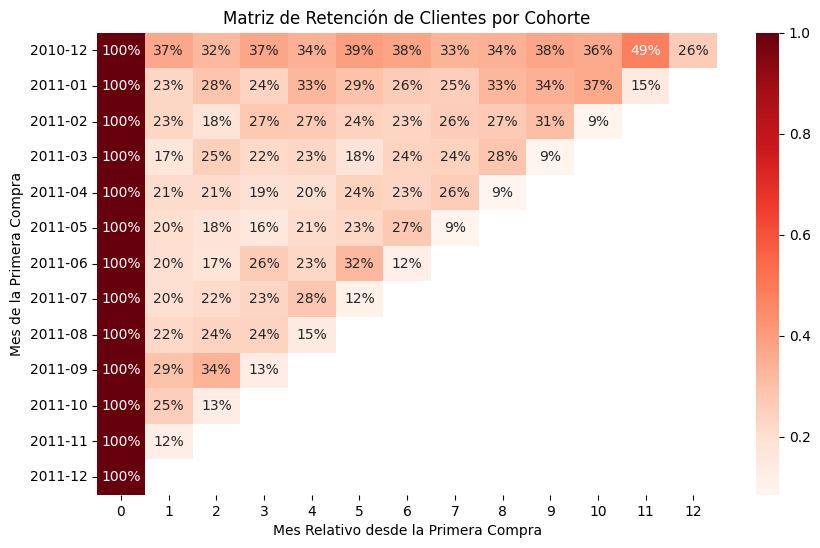

In [27]:
# Crear la columna 'CohortMonth' para identificar el mes de la primera compra y la columna 'TransactionMonth' para identificar el mes de cada
# transacción

df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
df['TransactionMonth'] = df['InvoiceDate'].dt.to_period('M')

# Crear columnas para calcular el número relativo de meses desde la primera compra
df['CohortIndex'] = (df['TransactionMonth'] - df['CohortMonth']).apply(lambda x: x.n)

# Contar el número de clientes únicos en cada cohorte para cada 'CohortIndex'
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivotar los datos para crear una matriz de cohortes
cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Dividir cada valor de la matriz por el número inicial de clientes en la cohorte para calcular la retención
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# Visualización del análisis de cohortes
plt.figure(figsize=(10, 6))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Reds')
plt.title('Matriz de Retención de Clientes por Cohorte')
plt.xlabel('Mes Relativo desde la Primera Compra')
plt.ylabel('Mes de la Primera Compra')
plt.show()

El análisis de cohortes realizado revela que existe una disminución notable en la retención de clientes después del primer mes de su compra inicial. Este comportamiento indica que una parte significativa de los clientes no realiza una compra de seguimiento inmediatamente después de su primera transacción, lo que puede representar un desafío para la empresa en términos de retención y lealtad.

Otro aspecto a resaltar es que al observar la cohorte de diciembre de 2010, se aprecia una recuperación significativa en los meses siguientes, lo que no se observa de manera consistente en otras cohortes. Esta mejora podría ser indicativa de factores específicos como campañas de marketing o la satisfacción obtenida al realizar compras en temporada navideña, lo cual coincide con el aumento de la retención en el mes de noviembre para esta cohorte.

In [22]:
type(df['InvoiceDate'])

pandas.core.series.Series